# Linear Regression

## 1 Explain how a linear regression algorithm trains in your own words

Linear regration takes 2 dimentional values in form of X points (can be x1,x2,x3....a vector) and corrosponding Y point values.

Based of given values of X1 the corrosponding Y1 can be calculated with hellp of linear regression. Here X1 is the point which is not belongs to known values of X.

It tries to derive the optimum Y = mX + c a line equation which has minimum squar error for the given data.

These Data is also known as training data set and used to derive the model (here it is equation of a line). So, the equation can be used to derive unknown values of Y* for given X* valuues and this is how linear regration algorith works. To verify performance of the model, data set is divided into two parts training X,Y and testing X*,Y*. 

Mean squared error and Coefficient of determination are used to check the performance of the model with respect to training and testing data set.

The model shift the line with possible values of m and c, such that error is minimum and in vase of multi dimentional X (multiple features) the equation is Y= m1X1 + m2X2 + m3X3 +.....+ mnXn + c and tries to calculate all m1, m2, .....mn and c for the same.



## 2 Load the sklearn boston dataset

In [2]:
#load and import all required libraries and functionalities
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load data from the web, clean it for data frame format and store as row data (in onw row instead of two) in target variable
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
print('Data in two rows 11+3\n',raw_df.head())
df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]
print('14 columns Data in one row\n',target)

Data in two rows 11+3
           0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
14 columns Data in one row
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6

In [4]:
#convert target to data frame format and apply column names for all 14 columns
data = pd.DataFrame(df)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3 Visualize the dataset using graphs

In [ ]:
#Get idea about each columns statistics
data.describe()

#Scatter plot for all columns 1 to 13 with table MEDV
Observations
#Positive correlation: RM, DIS
#Negative correlation: AGE, LSTAT

In [ ]:
plt.scatter(data['CRIM'],data['MEDV'])

In [ ]:
plt.scatter(data['ZN'],data['MEDV'])

In [ ]:
plt.scatter(data['INDUS'],data['MEDV'])

In [ ]:
plt.scatter(data['CHAS'],data['MEDV'])

In [ ]:
plt.scatter(data['NOX'],data['MEDV'])

In [ ]:
plt.scatter(data['RM'],data['MEDV'])

In [ ]:
plt.scatter(data['AGE'],data['MEDV'])

In [ ]:
plt.scatter(data['DIS'],data['MEDV'])

In [ ]:
plt.scatter(data['RAD'],data['MEDV'])

In [ ]:
plt.scatter(data['TAX'],data['MEDV'])

In [ ]:
plt.scatter(data['PTRATIO'],data['MEDV'])

In [ ]:
plt.scatter(data['B'],data['MEDV'])

In [ ]:
plt.scatter(data['LSTAT'],data['MEDV'])

#Histogram for all columns 1 to 14
Observations
#Similar in shape: LSMT, RM, PTRATIO, NOX

In [ ]:
#Lets explire histogram characteristics and find 1 peak graphs as MEDV
fig, axs = plt.subplots(7,2,figsize=(20,50))
for i in range(len(data.iloc[0])):
  axs[i%7,i%2].set_title(data.columns[i])
  axs[i%7,i%2].hist(data.iloc[:,i])

## 4 Calculate the pearson correlation matrix of the data

In [24]:
data = pd.DataFrame(df)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
data.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
corrs=data.corr()
corrs=corrs.iloc[-1]
corrs

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [18]:
for i,v in enumerate(corrs):
  corrs[i]=abs(v)
corrs=corrs.sort_values(ascending=False)
#corrs=corrs[1:]
corrs

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [19]:
corrs.index

Index(['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD',
       'AGE', 'ZN', 'B', 'DIS', 'CHAS'],
      dtype='object')

In [20]:
corrs=corrs[5:]
corrs

TAX     0.468536
NOX     0.427321
CRIM    0.388305
RAD     0.381626
AGE     0.376955
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64

In [21]:
list(corrs.index)

['TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS']

In [22]:
data=data.drop(columns=list(corrs.index))


In [23]:
data

,INDUS,RM,PTRATIO,LSTAT,MEDV
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2
...,...,...,...,...,...
501,11.93,6.593,21.0,9.67,22.4
502,11.93,6.120,21.0,9.08,20.6
503,11.93,6.976,21.0,5.64,23.9
504,11.93,6.794,21.0,6.48,22.0


In [ ]:
for i,v in enumerate(corrs.iloc[-1]):
  print(i,v,data.columns[[i]])
  if abs(round(v,1)) < 0.5:
    data.drop(data.iloc[:,i:i+1], axis=1, inplace=True)

Numeric values of correlation matrix
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.

<Axes: >

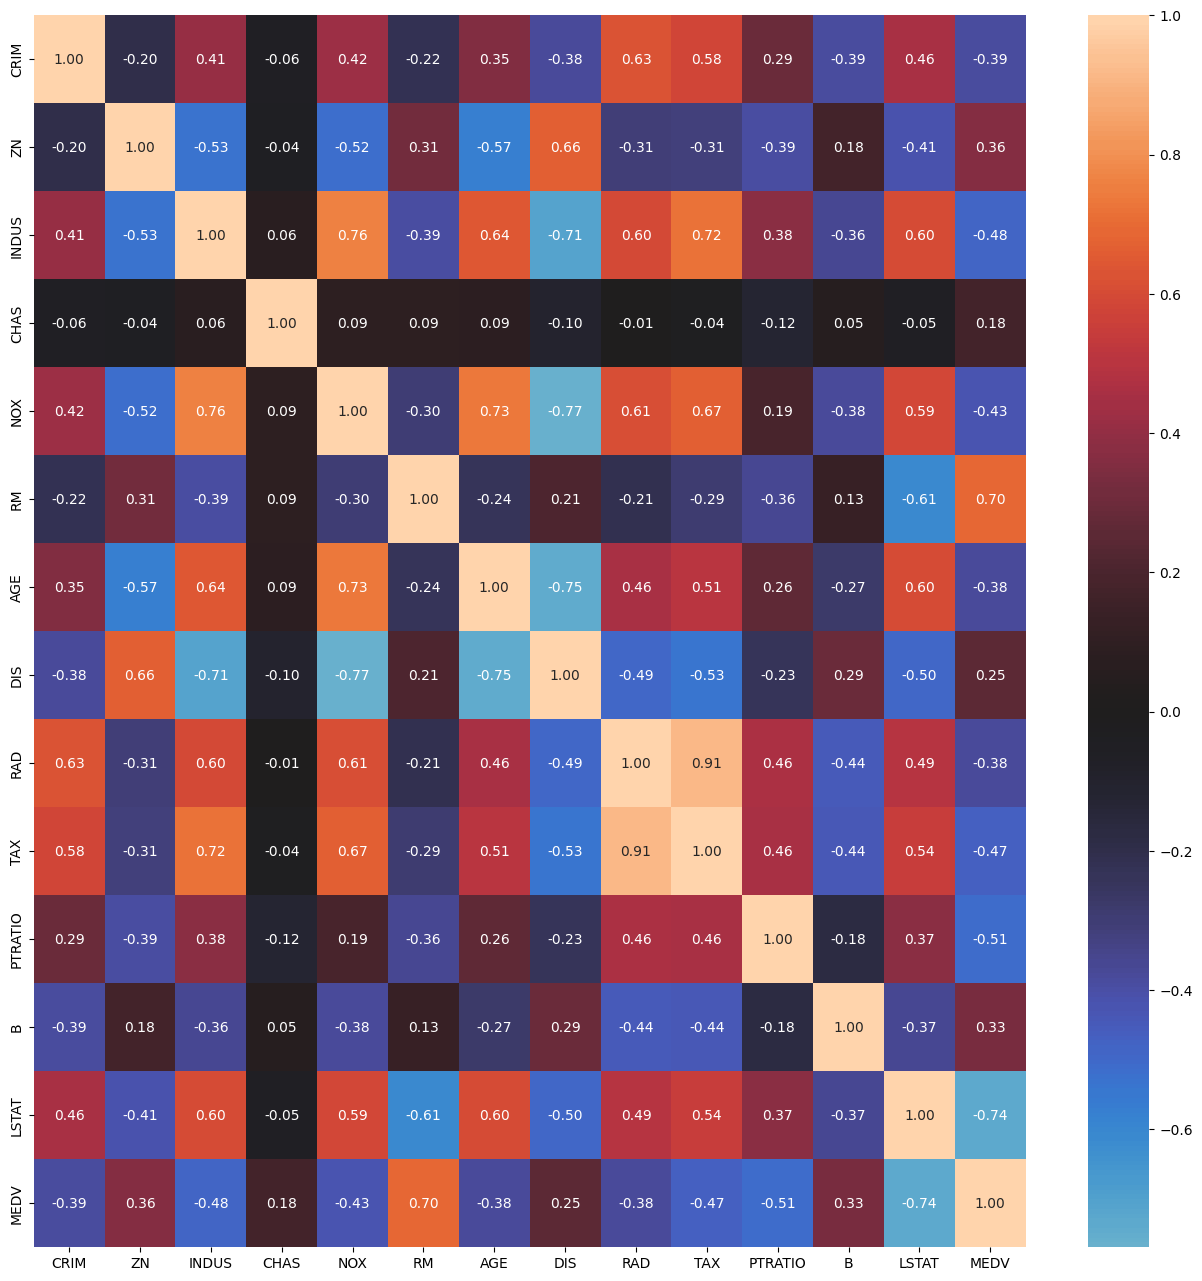

In [ ]:
# use covariance to check relation between each feature with other with pearson correlation matrix
corrs=data.corr()
print('Numeric values of correlation matrix\n',corrs)
print()
plt.figure(figsize=(16,16))
sns.heatmap(corrs,annot=True,fmt='0.2f',center=0)

## 5 Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

###According to scatter plots RM, DIS, AGE, LSTAT are the predicted features,
###Based on histogram LSMT, RM, PTRATIO, NOX are the most relavent features but
###according to pearson correlation matrix LSTAT, RM, INDUS, TAX are most relavent features.
#So they are not exactly same.


In [ ]:
from pandas.core.frame import DataFrame
#Selection of features which has greater then 0.5 correlation with Lable
thr_high=0.5
Fechs_No=len(corrs)-1
data_3=pd.DataFrame()
for i in range(Fechs_No):
  if(abs(corrs.iloc[i,Fechs_No])>thr_high):
    print(corrs.iloc[i,Fechs_No],corrs.columns[i],i)
    data_3[corrs.columns[i]]=data.iloc[:,i:i+1]
data_3.head()

0.6953599470715401 RM 5
-0.5077866855375623 PTRATIO 10
-0.7376627261740145 LSTAT 12


,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


## 6 Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

In [ ]:
#comparation of corr values among features with threshold of 75% (0.75)
thr_sim=0.75
col_no_del=[]
Fechs_No=len(corrs)-1
data_11=data.copy(deep=True);
for i in range(Fechs_No):
  for j in range(Fechs_No-i):
    if(corrs.iloc[i+j,j]>thr_sim and corrs.iloc[i+j,j]!=1):
      print(corrs.iloc[i+j,j],corrs.columns[i+j],i+j,corrs.iloc[i+j,Fechs_No],corrs.columns[j],j,corrs.iloc[j,Fechs_No],'\n')
      if(abs(corrs.iloc[i+j,Fechs_No]) < abs(corrs.iloc[j,Fechs_No])):
        col_no_del.append(corrs.columns[i+j])
      else:
        col_no_del.append(corrs.columns[j])

for i in col_no_del:
  print('Removing column :',i)
  data_11.drop(data_11[[i]], axis = 1, inplace = True)
  print(data_11.columns[:],'\n')

0.9102281885331865 TAX 9 -0.4685359335677667 RAD 8 -0.38162623063977735 

0.7636514469209139 NOX 4 -0.42732077237328203 INDUS 2 -0.48372516002837274 

Removing column : RAD
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object') 

Removing column : NOX
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object') 



## 7 perform the following steps 3 times, 1 with the entire dataset, 1 with the selected features from step 5 and 1 with the selected features from step 6 

## NOTE: FEATURE SELECTION IS USUALLY REQUIRED ONLY WHEN THERE ARE 100s TO 1000s OF FEATURES OR MORE, BUT HERE FOR EDUCATIONAL PURPOSES WE ARE PRACTICING FEATURE SELECTION ON A SMALLER DATASET

## Full Data set: data
## Data with only selected lables with 0.5 coorrelation threshold: data_3
## Data with removed features with > 0.75 correlation with Lables: data_11

## 8 Split into train and test

In [ ]:
# Selecting the Xdata,X3data,X11data and Y data
Fechers_No_data=len(data.iloc[0])-1
Fechers_No_data3=len(data_3.iloc[0])
Fechers_No_data11=len(data_11.iloc[0])-1
Xdata = data.iloc[:,:Fechers_No_data]  #selecting all columns except "MEDV"
Xdata_3 = data_3.iloc[:,:Fechers_No_data3]  #selecting all columns except "MEDV"
Xdata_11 = data_11.iloc[:,:Fechers_No_data11]  #selecting all columns except "MEDV"
ydata = data.iloc[:,Fechers_No_data:Fechers_No_data+1] #selecting target(price in this case)
print(ydata.columns[:])

#Split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size = 0.25,random_state=11)
X3_train, X3_test, y3_train, y3_test = train_test_split(Xdata_3, ydata, test_size = 0.25,random_state=11)
X11_train, X11_test, y11_train, y11_test = train_test_split(Xdata_11, ydata, test_size = 0.25,random_state=11)

Index(['MEDV'], dtype='object')


## 9 Normalize the data

In [ ]:
# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler3 =  MinMaxScaler()
scaler3.fit(X3_train)
X3_train_scaled = scaler3.transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

scaler11 =  MinMaxScaler()
scaler11.fit(X11_train)
X11_train_scaled = scaler11.transform(X11_train)
X11_test_scaled = scaler11.transform(X11_test)

## 10 Train the model and perform hyper parameter tuning using cross validation

In [ ]:
# training of linear regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

regressor3 = LinearRegression()
regressor3.fit(X3_train_scaled,y3_train)

regressor11 = LinearRegression()
regressor11.fit(X11_train_scaled,y11_train)

LinearRegression()

## 11 Test the model on test set

In [ ]:
# making predictions for the Xdata, data test set
y_test_pred = regressor.predict(X_test_scaled)
MSE=mean_squared_error(y_test, y_test_pred)
COD=r2_score(y_test, y_test_pred)
print('Mean squared error for testing set: %.2f'%MSE)
print('Coefficient of determination for testing set: %.2f'%COD)

Mean squared error for testing set: 25.53
Coefficient of determination for testing set: 0.68


In [ ]:
# making predictions for the X3data, data_3 test set
y3_test_pred = regressor3.predict(X3_test_scaled)
MSE3=mean_squared_error(y3_test, y3_test_pred)
COD3=r2_score(y3_test, y3_test_pred)
print('Mean squared error for testing set: %.2f'%MSE3)
print('Coefficient of determination for testing set: %.2f'%COD3)

Mean squared error for testing set: 28.86
Coefficient of determination for testing set: 0.64


In [ ]:
# making predictions for the X11data, data_11 test set
y11_test_pred = regressor11.predict(X11_test_scaled)
MSE11=mean_squared_error(y11_test, y11_test_pred)
COD11=r2_score(y11_test, y11_test_pred)
print('Mean squared error for testing set: %.2f'%MSE11)
print('Coefficient of determination for testing set: %.2f'%COD11)

Mean squared error for testing set: 26.81
Coefficient of determination for testing set: 0.67


In [ ]:
#Performance comparation for all 3 models
print('######################################################################################')
print('No of features','\t','13 features','\t\t','11 features','\t\t','3 features')
print('MSE values','\t',MSE,'\t',MSE3,'\t',MSE11)
print('COD values ','\t',COD,'\t',COD3,'\t',COD11)
print('######################################################################################')

######################################################################################
No of features 	 13 features 		 11 features 		 3 features
MSE values 	 25.525190907490796 	 28.859192047880335 	 26.805368147724316
COD values  	 0.6845664376687204 	 0.6433657328300744 	 0.6687463457146273
######################################################################################


#Conclusion and Learning:
#Number of features does not gaurrantee for the best performance as here 3 features are also working as similar as 13